## Advanced Regression assignment
### Surprice Housing 
We have a  data set from the sale of houses in Australia. We have to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

#### Our Target is
* Which variables are significant in predicting the price of a house, 
* How well those variables describe the price of a house.
* Determine the optimal value of lambda for ridge and lasso regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### Reading Data

In [3]:
HousePrice=pd.read_csv('train.csv')
HousePrice.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
HousePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
HousePrice.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

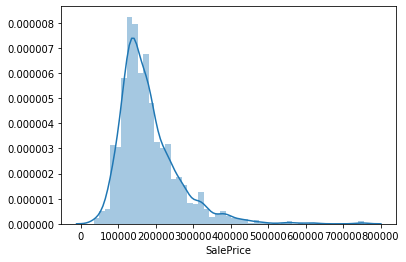

In [6]:
# Understanding SalePrice variable 
sns.distplot(HousePrice['SalePrice'])
plt.show()

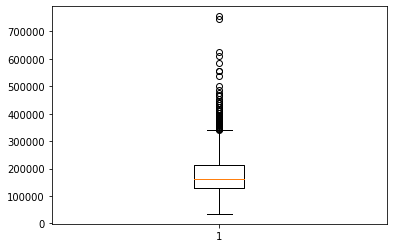

In [7]:
plt.boxplot(HousePrice['SalePrice'])
plt.show()

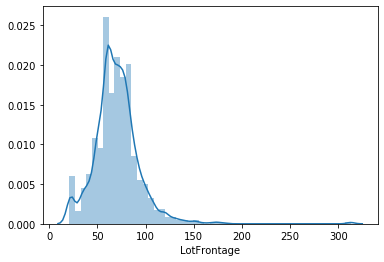

In [8]:
# Understanding predictor variables 
sns.distplot(HousePrice['LotFrontage'])
plt.show()

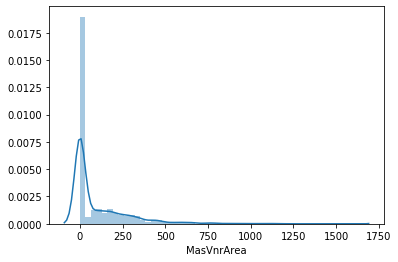

In [9]:
# Understanding predictor variables 
# As per graph data is skewed and we need to drop some variables to deal with skewness
sns.distplot(HousePrice['MasVnrArea'])
plt.show()


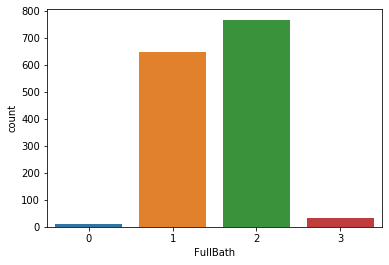

In [10]:
sns.countplot(x='FullBath',data=HousePrice)

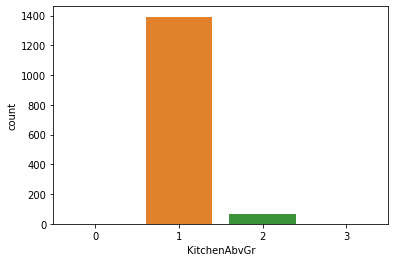

In [11]:
sns.countplot(x='KitchenAbvGr',data=HousePrice)

## Step1: EDA data cleaning
### Missing value checking and imputation

In [12]:
# percentage of missing values in each column
(round(HousePrice.isnull().sum()/len(HousePrice.index), 2)*100).sort_values(ascending = False)

PoolQC           100.0
MiscFeature       96.0
Alley             94.0
Fence             81.0
FireplaceQu       47.0
LotFrontage       18.0
GarageType         6.0
GarageCond         6.0
GarageYrBlt        6.0
GarageFinish       6.0
GarageQual         6.0
BsmtFinType1       3.0
BsmtExposure       3.0
BsmtCond           3.0
BsmtQual           3.0
BsmtFinType2       3.0
MasVnrArea         1.0
MasVnrType         1.0
Exterior2nd        0.0
Exterior1st        0.0
OverallCond        0.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
RoofMatl           0.0
RoofStyle          0.0
YearRemodAdd       0.0
YearBuilt          0.0
SalePrice          0.0
OverallQual        0.0
HouseStyle         0.0
BldgType           0.0
Condition2         0.0
Condition1         0.0
Neighborhood       0.0
LandSlope          0.0
LotConfig          0.0
Utilities          0.0
LandContour        0.0
LotShape           0.0
Street             0.0
LotArea            0.0
MSZoning           0.0
MSSubClass 

### Columns having more missing values dropped as it will not help in analysis

In [13]:
# Columns having more than 10% having high amount of null data imputation will not fruitful for the columns better to drop
HousePrice = HousePrice.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis=1)

In [14]:
# Dropping ID column as it is insignificant in our analysis
HousePrice=HousePrice.drop(['Id'],axis=1)

In [15]:
(round(HousePrice.isnull().sum()/len(HousePrice.index), 2)*100).sort_values(ascending = False)

GarageCond       6.0
GarageType       6.0
GarageYrBlt      6.0
GarageFinish     6.0
GarageQual       6.0
BsmtFinType2     3.0
BsmtFinType1     3.0
BsmtExposure     3.0
BsmtCond         3.0
BsmtQual         3.0
MasVnrType       1.0
MasVnrArea       1.0
YearBuilt        0.0
ExterQual        0.0
Exterior2nd      0.0
Exterior1st      0.0
ExterCond        0.0
Foundation       0.0
BsmtFinSF1       0.0
RoofMatl         0.0
RoofStyle        0.0
YearRemodAdd     0.0
SalePrice        0.0
OverallCond      0.0
OverallQual      0.0
BsmtFinSF2       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope        0.0
LotConfig        0.0
Utilities        0.0
LandContour      0.0
LotShape         0.0
Street           0.0
LotArea          0.0
MSZoning         0.0
HouseStyle       0.0
Heating          0.0
BsmtUnfSF        0.0
TotRmsAbvGrd     0.0
SaleType         0.0
YrSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch    

In [16]:
HousePrice['GarageType'].value_counts()
# Null values to be replaced by Attchd 

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [17]:
HousePrice['GarageCond'].value_counts()
# Null values to be replaced by TA 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [18]:
HousePrice['GarageYrBlt'].median()
# Null values to be treated by median which is 1980

1980.0

In [19]:
HousePrice['GarageQual'].value_counts()
# Null values to be treated by mode which is TA

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [20]:
HousePrice['GarageFinish'].value_counts()
# Null values to be treated by mode which is Unf

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [21]:
HousePrice['BsmtFinType1'].value_counts()
# Null values to be treated by mode which is Unf

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [22]:
HousePrice['BsmtExposure'].value_counts()
# Null values to be treated by mode which is No

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [23]:
HousePrice['BsmtCond'].value_counts()
# Null values to be treated by mode which is TA

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [24]:
HousePrice['BsmtQual'].value_counts()
# Null values to be treated by mode which is TA

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [25]:
HousePrice['BsmtFinType2'].value_counts()
# Null values to be treated by mode which is Unf

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [26]:
HousePrice['MasVnrType'].value_counts()
# Null values to be treated by mode which is None

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [27]:
HousePrice['MasVnrArea'].mean()

103.68526170798899

### Categorical data imputation

In [28]:
# Imputation done as per above analysis for variables
HousePrice.MasVnrType.fillna('None',inplace=True)
HousePrice.MasVnrArea.fillna(HousePrice.MasVnrArea.mean(),inplace=True)
HousePrice.BsmtQual.fillna('TA',inplace=True)
HousePrice.BsmtCond.fillna('TA',inplace=True)
HousePrice.BsmtExposure.fillna('No',inplace=True)
HousePrice.BsmtFinType1.fillna('Unf',inplace=True)
HousePrice.BsmtFinType2.fillna('Unf',inplace=True)
HousePrice.GarageType.fillna('Attchd',inplace=True)
#HousePrice.GarageYrBlt.fillna(1980,inplace=True)
HousePrice.GarageYrBlt.fillna(HousePrice.YearBuilt,inplace=True)
#Assumed Garage year built is same as Year of built
HousePrice.GarageFinish.fillna('Unf',inplace=True)
HousePrice.GarageQual.fillna('TA',inplace=True)
HousePrice.GarageCond.fillna('TA',inplace=True)

In [29]:
#Check again if there are any columns
(round(HousePrice.isnull().sum()/len(HousePrice.index), 2)*100).values>0,00

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 0)

In [30]:
# Drop duplicates if any
HousePrice=HousePrice.drop_duplicates()

In [31]:
# Now as per Data description area categorized better to make total area and drop other columns
HousePrice['TotalSF'] = HousePrice['TotalBsmtSF'] + HousePrice['1stFlrSF'] + HousePrice['2ndFlrSF']
HousePrice=HousePrice.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1)

### Years to be treated and converted to age

In [32]:
# Years to be extracted from built year
HousePrice["HouseAge"] = 2020 - HousePrice["YearBuilt"]
# Years to be extracted from garage built year
HousePrice["GarageAge"] = 2020 - HousePrice["GarageYrBlt"]
# Drop oringinal columns as we have derived columns
HousePrice=HousePrice.drop(['YearBuilt','GarageYrBlt'],axis=1)

## Step2:Data preperation

### Target variable skewness to be treated

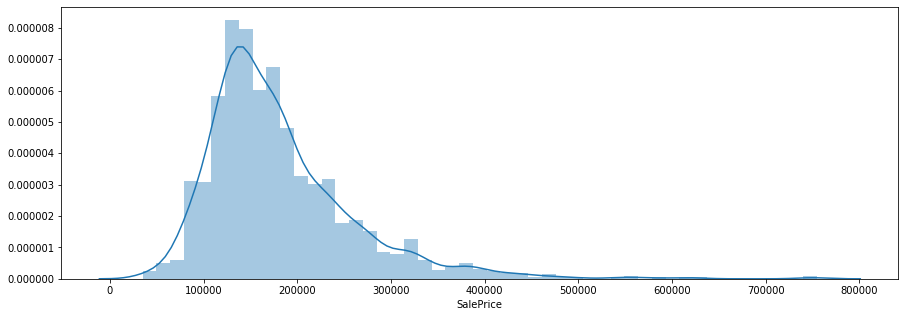

In [33]:
plt.figure(figsize=(15,5))
sns.distplot(HousePrice.SalePrice)
plt.show()
# As shown below data is right skew

In [34]:
HousePrice['SalePrice']=np.log(HousePrice['SalePrice'])

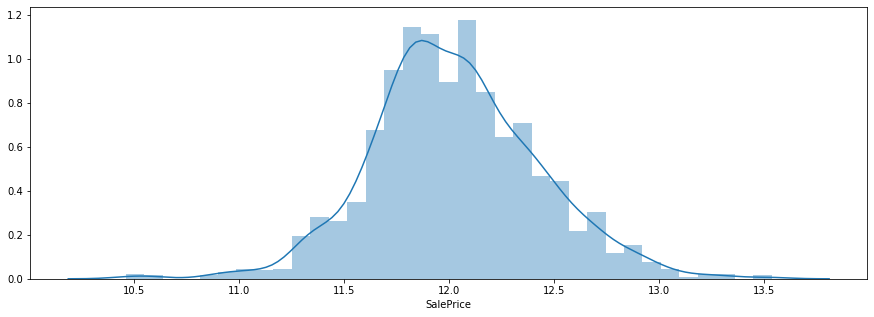

In [35]:
plt.figure(figsize=(15,5))
sns.distplot(HousePrice.SalePrice)
plt.show()
# After log transformation data is skewed properly

### Dummies conversion for caterogrical columns

In [36]:
# Converting to object datatype for variables which are int before hot encoding application
HousePrice['MSSubClass'] = HousePrice['MSSubClass'].astype('object')
HousePrice['OverallCond'] = HousePrice['OverallCond'].astype('object')
HousePrice['YrSold'] = HousePrice['YrSold'].astype('object')

In [37]:
HousePrice.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0         60       RL     8450   Pave      Reg         Lvl    AllPub   
1         20       RL     9600   Pave      Reg         Lvl    AllPub   
2         60       RL    11250   Pave      IR1         Lvl    AllPub   
3         70       RL     9550   Pave      IR1         Lvl    AllPub   
4         60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual OverallCond  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            7           5          2003     Gable  CompShg     VinylSd   
1            6           8          1976     Gable  CompShg     MetalSd   
2            7           5          2002     Gable  CompShg     VinylSd   
3            7           5          1970     Gable  CompShg     Wd Sdng   
4            8           5          2000     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF Heating HeatingQC CentralAir Electrical  LowQualFinSF  GrLivArea  \
0        150    GasA        Ex          Y      SBrkr             0       1710   
1        284    GasA        Ex          Y      SBrkr             0       1262   
2        434    GasA        Ex          Y      SBrkr             0       1786   
3        540    GasA        Gd          Y      SBrkr             0       1717   
4        490    GasA        Ex          Y      SBrkr             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType GarageFinish  \
0          Gd             8        Typ           0     Attchd          RFn   
1          TA             6        Typ           1     Attchd          RFn   
2          Gd             6        Typ           1     Attchd          RFn   
3          Gd             7        Typ           1     Detchd          Unf   
4          Gd             9        Typ           1     Attchd          RFn   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0           2         548         TA         TA          Y           0   
1           2         460         TA         TA          Y         298   
2           2         608   

In [38]:
HousePrice_cont=HousePrice.select_dtypes(include=['float64','int64'])
HousePrice_cont.head()

LotArea  OverallQual  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0     8450            7          2003       196.0         706           0   
1     9600            6          1976         0.0         978           0   
2    11250            7          2002       162.0         486           0   
3     9550            7          1970         0.0         216           0   
4    14260            8          2000       350.0         655           0   

   BsmtUnfSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0        150             0       1710             1             0         2   
1        284             0       1262             0             1         2   
2        434             0       1786             1             0         2   
3        540             0       1717             1             0         1   
4        490             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  SalePrice  TotalSF  HouseAge  GarageAge  
0         0        0  12.247694     2566        17       17.0  
1         0        0  12.109011     2524        44       44.0  
2         0        0  12.317167     2706        19       19.0  
3         0        0  11.849398     2473       105       22.0  
4         0        0  12.429216     3343        20       20.0

In [39]:
HousePrice_cat=HousePrice.select_dtypes(include=['object'])
HousePrice_cat.head()

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
0           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
1           8     Gable  CompShg     MetalSd     MetalSd       None        TA   
2           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
3           5     Gable  CompShg     Wd Sdng     Wd Shng       None        TA   
4           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

  BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0          Unf    GasA        Ex          Y      SBrkr          Gd        Typ   
1          Unf    GasA        Ex          Y      SBrkr          TA        Typ   
2          Unf    GasA        Ex          Y      SBrkr          Gd        Typ   
3          Unf    GasA        Gd          Y      SBrkr          Gd        Typ   
4          Unf    GasA        Ex          Y      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive YrSold SaleType  \
0     Attchd          RFn         TA         TA          Y   2008       WD   
1     Attchd          RFn         TA         TA          Y   2007       WD   
2     Attchd          RFn         TA         TA          Y   2008       WD   
3     Detchd          Unf         TA         TA          Y   2006       WD   
4     Attchd          RFn         TA         TA          Y   2008       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [40]:
# Coverting binary variable first
HousePrice_cat["CentralAir"]=HousePrice_cat["CentralAir"].map({'Y': 1, "N": 0})

In [41]:
HousePrice_dummies = pd.get_dummies(HousePrice_cat, drop_first=True)
HousePrice_dummies.shape

(1460, 222)

In [42]:
# Dropping and cocating 

HousePrice=pd.concat([HousePrice,HousePrice_dummies],axis=1)
HousePrice.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0         60       RL     8450   Pave      Reg         Lvl    AllPub   
1         20       RL     9600   Pave      Reg         Lvl    AllPub   
2         60       RL    11250   Pave      IR1         Lvl    AllPub   
3         70       RL     9550   Pave      IR1         Lvl    AllPub   
4         60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual OverallCond  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            7           5          2003     Gable  CompShg     VinylSd   
1            6           8          1976     Gable  CompShg     MetalSd   
2            7           5          2002     Gable  CompShg     VinylSd   
3            7           5          1970     Gable  CompShg     Wd Sdng   
4            8           5          2000     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF Heating HeatingQC CentralAir Electrical  LowQualFinSF  GrLivArea  \
0        150    GasA        Ex          Y      SBrkr             0       1710   
1        284    GasA        Ex          Y      SBrkr             0       1262   
2        434    GasA        Ex          Y      SBrkr             0       1786   
3        540    GasA        Gd          Y      SBrkr             0       1717   
4        490    GasA        Ex          Y      SBrkr             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces  ... HeatingQC_Gd  \
0          Gd             8        Typ           0  ...            0   
1          TA             6        Typ           1  ...            0   
2          Gd             6        Typ           1  ...            0   
3          Gd             7        Typ           1  ...            1   
4          Gd             9        Typ           1  ...            0   

  HeatingQC_Po  HeatingQC_TA  Electrical_FuseF Electrical_FuseP  \
0            0             0                 0                0   
1            0             0                 0                0   
2            0             0                 0                0   
3            0    

In [43]:
HousePrice = HousePrice.drop(list(HousePrice_cat.columns),axis=1)
HousePrice.head()

LotArea  OverallQual  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0     8450            7          2003       196.0         706           0   
1     9600            6          1976         0.0         978           0   
2    11250            7          2002       162.0         486           0   
3     9550            7          1970         0.0         216           0   
4    14260            8          2000       350.0         655           0   

   BsmtUnfSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0        150             0       1710             1             0         2   
1        284             0       1262             0             1         2   
2        434             0       1786             1             0         2   
3        540             0       1717             1             0         1   
4        490             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  SalePrice  TotalSF  HouseAge  GarageAge  MSSubClass_30  \
0         0        0  12.247694     2566        17       17.0              0   
1         0        0  12.109011     2524        44       44.0              0   
2         0        0  12.317167     2706        19       19.0              0   
3         0        0  11.849398     2473       105       22.0              0   
4         0        0  12.429216     3343        20       20.0              0   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0              0              0              0              1              0   
1              0              0              0              0              0   
2              0              0              0              1              0   
3              0              0              0              0              1   
4              0              0              0              1              0   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0              0               0   
1              0              0              0              0               0   
2              0              0              0              0               0   
3              0              0              0              0               0   
4              0              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   
2               0               0               0            0            0   
3               0               0               0            0            0   
4               0               0               0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  ...  HeatingQC_Gd  \
0            1            0            1             0  ...             0   
1            

In [44]:
HousePrice.shape

(1460, 251)

### Data Visualization
Now our data is ready before start we need to visualize and see correlation etc.

<Figure size 3600x2160 with 0 Axes>

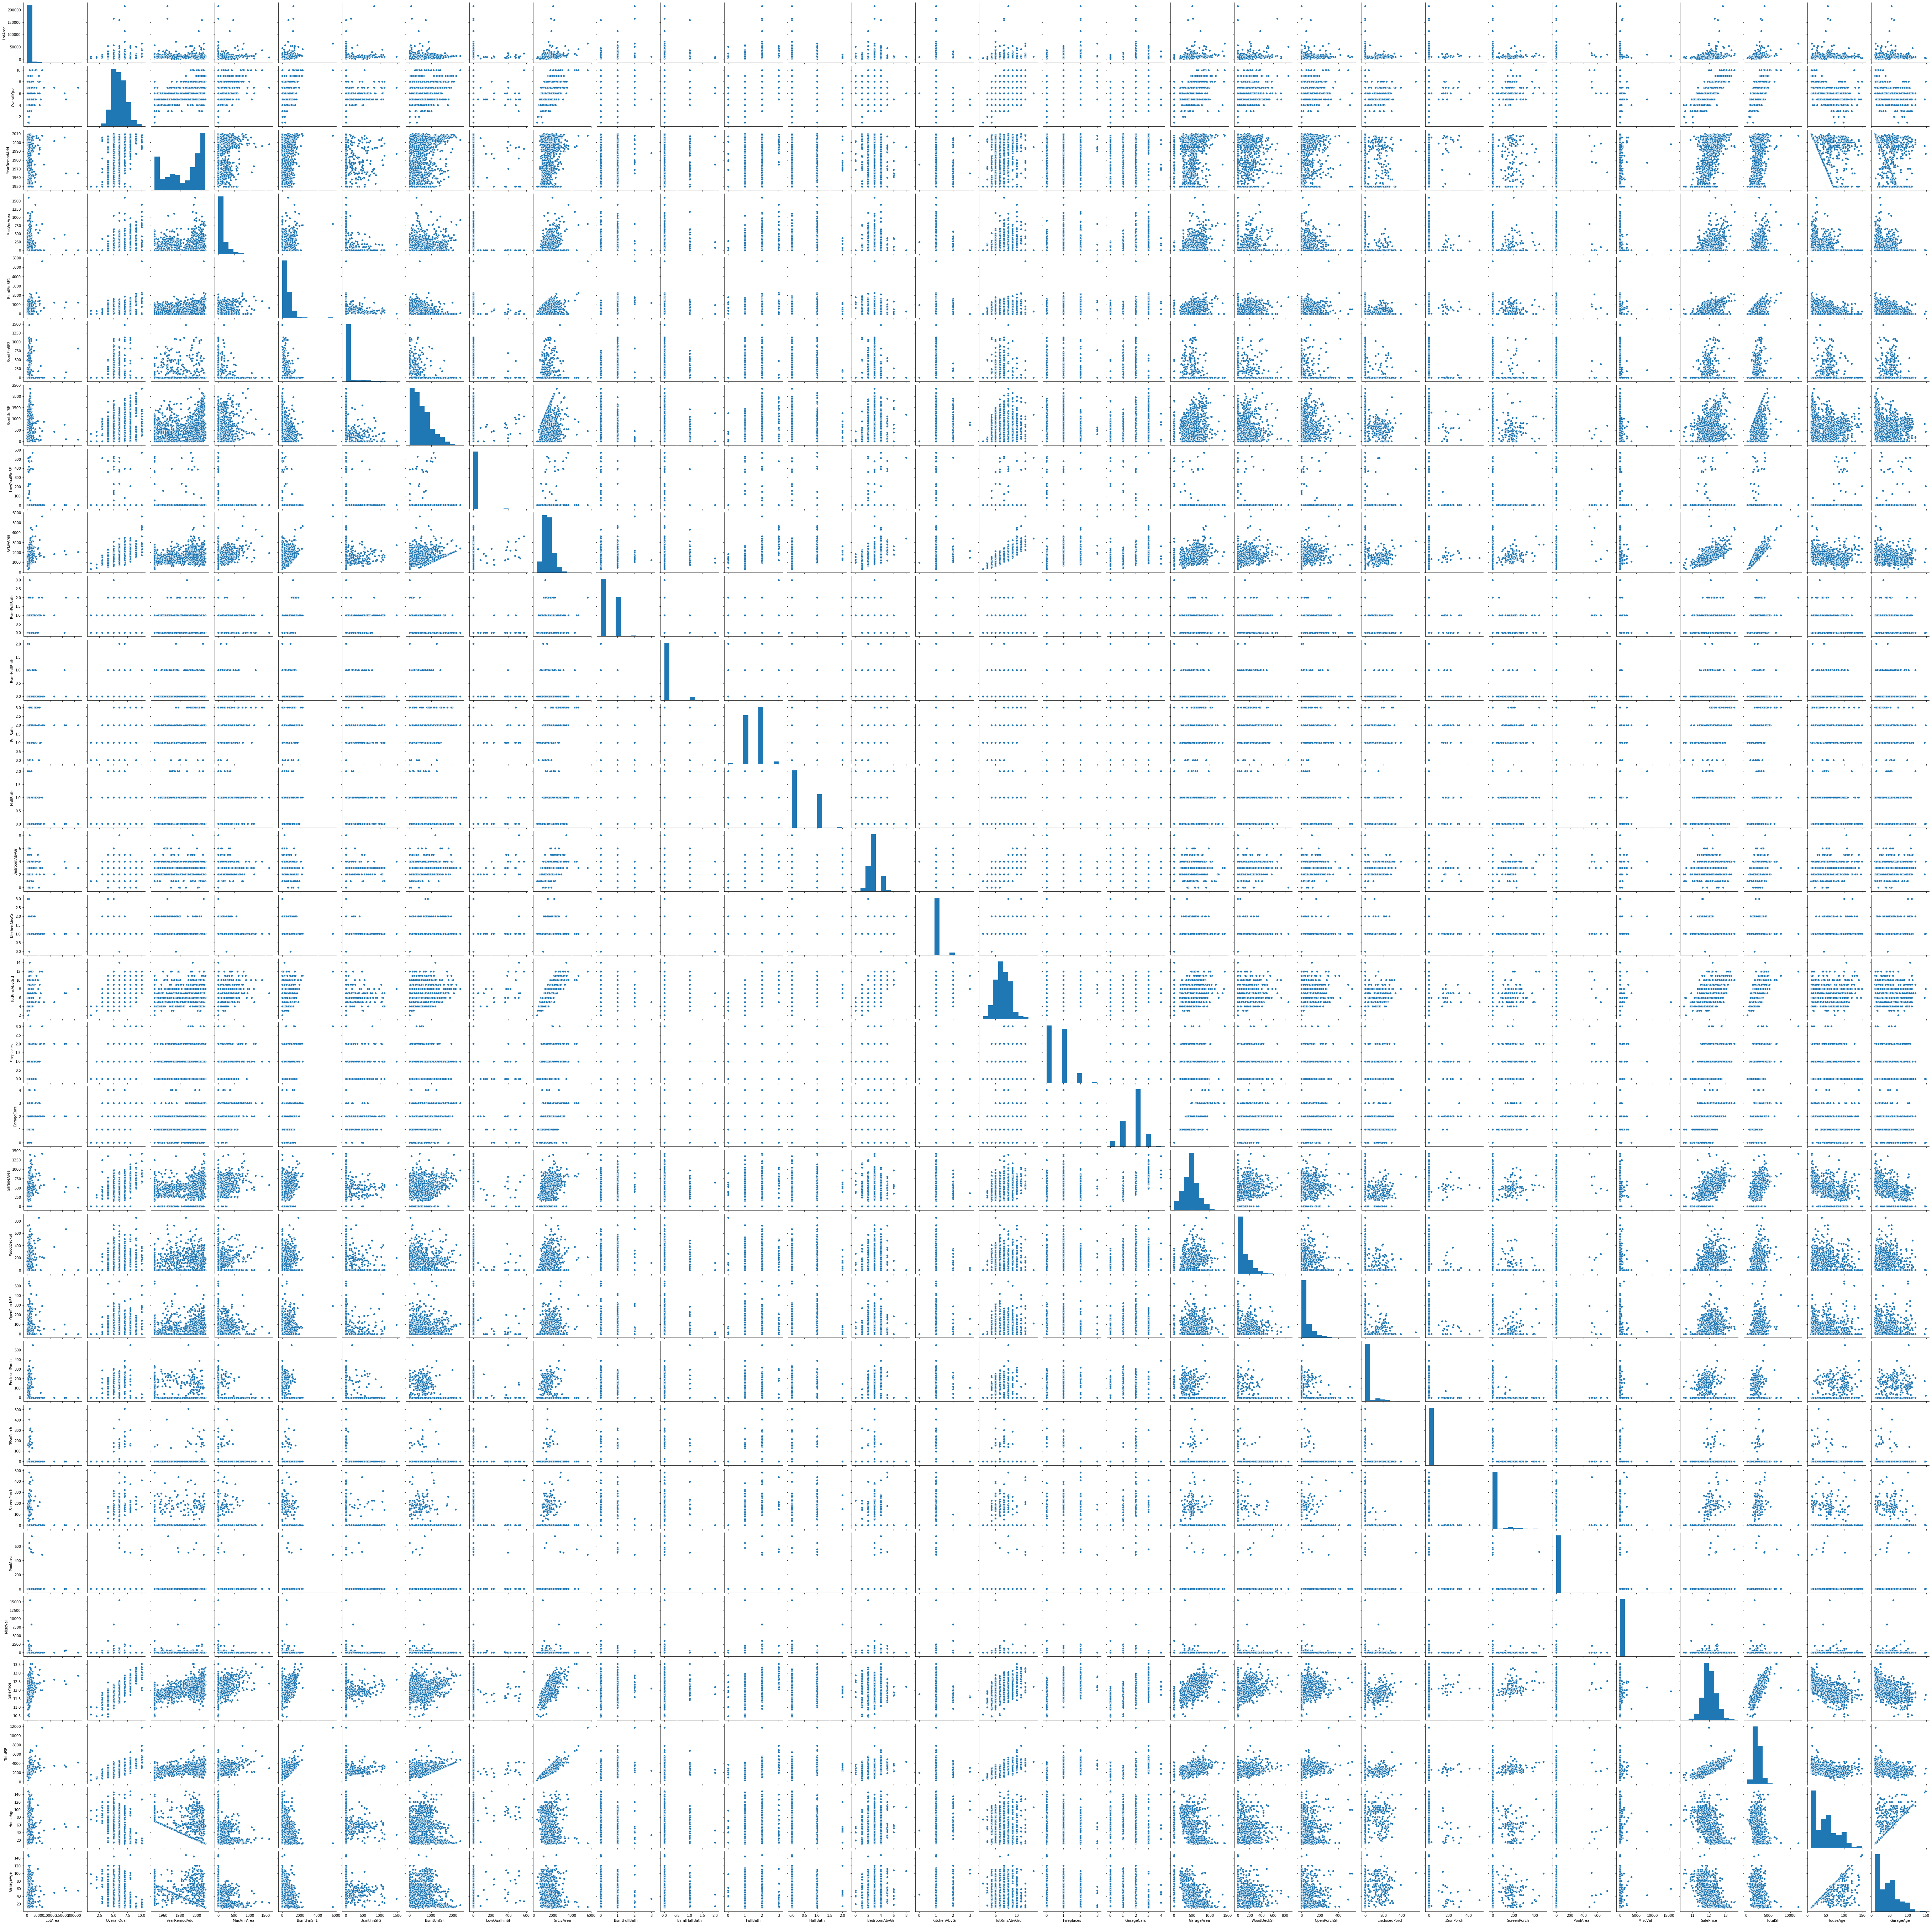

In [45]:
# Pairwise scatter plot for continuous variables
plt.figure(figsize=(50,30))
sns.pairplot(HousePrice_cont)
plt.show()

As some data is heavily skew and opposes assumption of linear regression, also suggested during session to drop so dropping these columns

In [46]:
HousePrice=HousePrice.drop(['LowQualFinSF','BsmtFinSF1','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','LotArea'],axis=1)


In [47]:
# Correlation matrix
cor = HousePrice_cont.corr()
cor

LotArea  OverallQual  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
LotArea        1.000000     0.105806      0.013788    0.103960    0.214103   
OverallQual    0.105806     1.000000      0.550684    0.410238    0.239666   
YearRemodAdd   0.013788     0.550684      1.000000    0.179186    0.128451   
MasVnrArea     0.103960     0.410238      0.179186    1.000000    0.263582   
BsmtFinSF1     0.214103     0.239666      0.128451    0.263582    1.000000   
BsmtFinSF2     0.111170    -0.059119     -0.067759   -0.072302   -0.050117   
BsmtUnfSF     -0.002618     0.308159      0.181133    0.114184   -0.495251   
LowQualFinSF   0.004779    -0.030429     -0.062419   -0.069068   -0.064503   
GrLivArea      0.263116     0.593007      0.287389    0.389893    0.208171   
BsmtFullBath   0.158155     0.111098      0.119470    0.085055    0.649212   
BsmtHalfBath   0.048046    -0.040150     -0.012337    0.026669    0.067418   
FullBath       0.126031     0.550600      0.439046    0.275730    0.058543   
HalfBath       0.014259     0.273458      0.183331    0.200802    0.004262   
BedroomAbvGr   0.119690     0.101676     -0.040581    0.102417   -0.107355   
KitchenAbvGr  -0.017784    -0.183882     -0.149598   -0.037364   -0.081007   
TotRmsAbvGrd   0.190015     0.427452      0.191740    0.280027    0.044316   
Fireplaces     0.271364     0.396765      0.112581    0.247906    0.260011   
GarageCars     0.154871     0.600671      0.420622    0.363778    0.224054   
GarageArea     0.180403     0.562022      0.371600    0.372567    0.296970   
WoodDeckSF     0.171698     0.238923      0.205726    0.159349    0.204306   
OpenPorchSF    0.084774     0.308819      0.226298    0.124965    0.111761   
EnclosedPorch -0.018340    -0.113937     -0.193919   -0.109849   -0.102303   
3SsnPorch      0.020423     0.030371      0.045286    0.018795    0.026451   
ScreenPorch    0.043160     0.064886     -0.038740    0.061453    0.062021   
PoolArea       0.077672     0.065166      0.005829    0.011723    0.140491   
MiscVal        0.038068    -0.031406     -0.010286   -0.029815    0.003571   
SalePrice      0.257320     0.817184      0.565608    0.429531    0.372023   
TotalSF        0.307234     0.668155      0.342873    0.446930    0.415843   
HouseAge      -0.014228    -0.572323     -0.592855   -0.314745   -0.249503   
GarageAge     -0.003669    -0.555022     -0.604353   -0.270411   -0.184657   

               BsmtFinSF2  BsmtUnfSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
LotArea          0.111170  -0.002618      0.004779   0.263116      0.158155   
OverallQual     -0.059119   0.308159     -0.030429   0.593007      0.111098   
YearRemodAdd    -0.067759   0.181133     -0.062419   0.287389      0.119470   
MasVnrArea      -0.072302   0.114184     -0.069068   0.389893      0.085055   
BsmtFinSF1      -0.050117  -0.495251     -0.064503   0.208171      0.649212   
BsmtFinSF2       1.000000  -0.209294      0.014807  -0.009640      0.158678   
BsmtUnfSF       -0.209294   1.000000      0.028167   0.240257     -0.422900   
LowQualFinSF     0.014807   0.028167      1.000000   0.134683     -0.047143   
GrLivArea       -0.009640   0.240257      0.134683   1.000000      0.034836   
BsmtFullBath     0.158678  -0.422900     -0.047143   0.034836      1.000000   
BsmtHalfBath     0.070948  -0.095804     -0.005842  -0.018918     -0.147871   
FullBath        -0.076444   0.288886     -0.000710   0.630012     -0.064512   
HalfBath        -0.032148  -0.041118     -0.027080   0.415772     -0.030905   
BedroomAbvGr    -0.015728   0.166643      0.105607   0.521270     -0.150673   
KitchenAbvGr    -0.040751   0.030086      0.007522   0.100063     -0.041503   
TotRmsAbvGrd    -0.035227   0.250647      0.131185   0.825489     -0.053275   
Fireplaces       0.046921   0.051575     -0.021272   0.461679      0.137928   
GarageCars      -0.038264   0.214175     -0.094480   0.467247      0.131881   
GarageArea      -0.018227   0.183303     -0.067601   0.468997      0.179189   
WoodDeckSF       

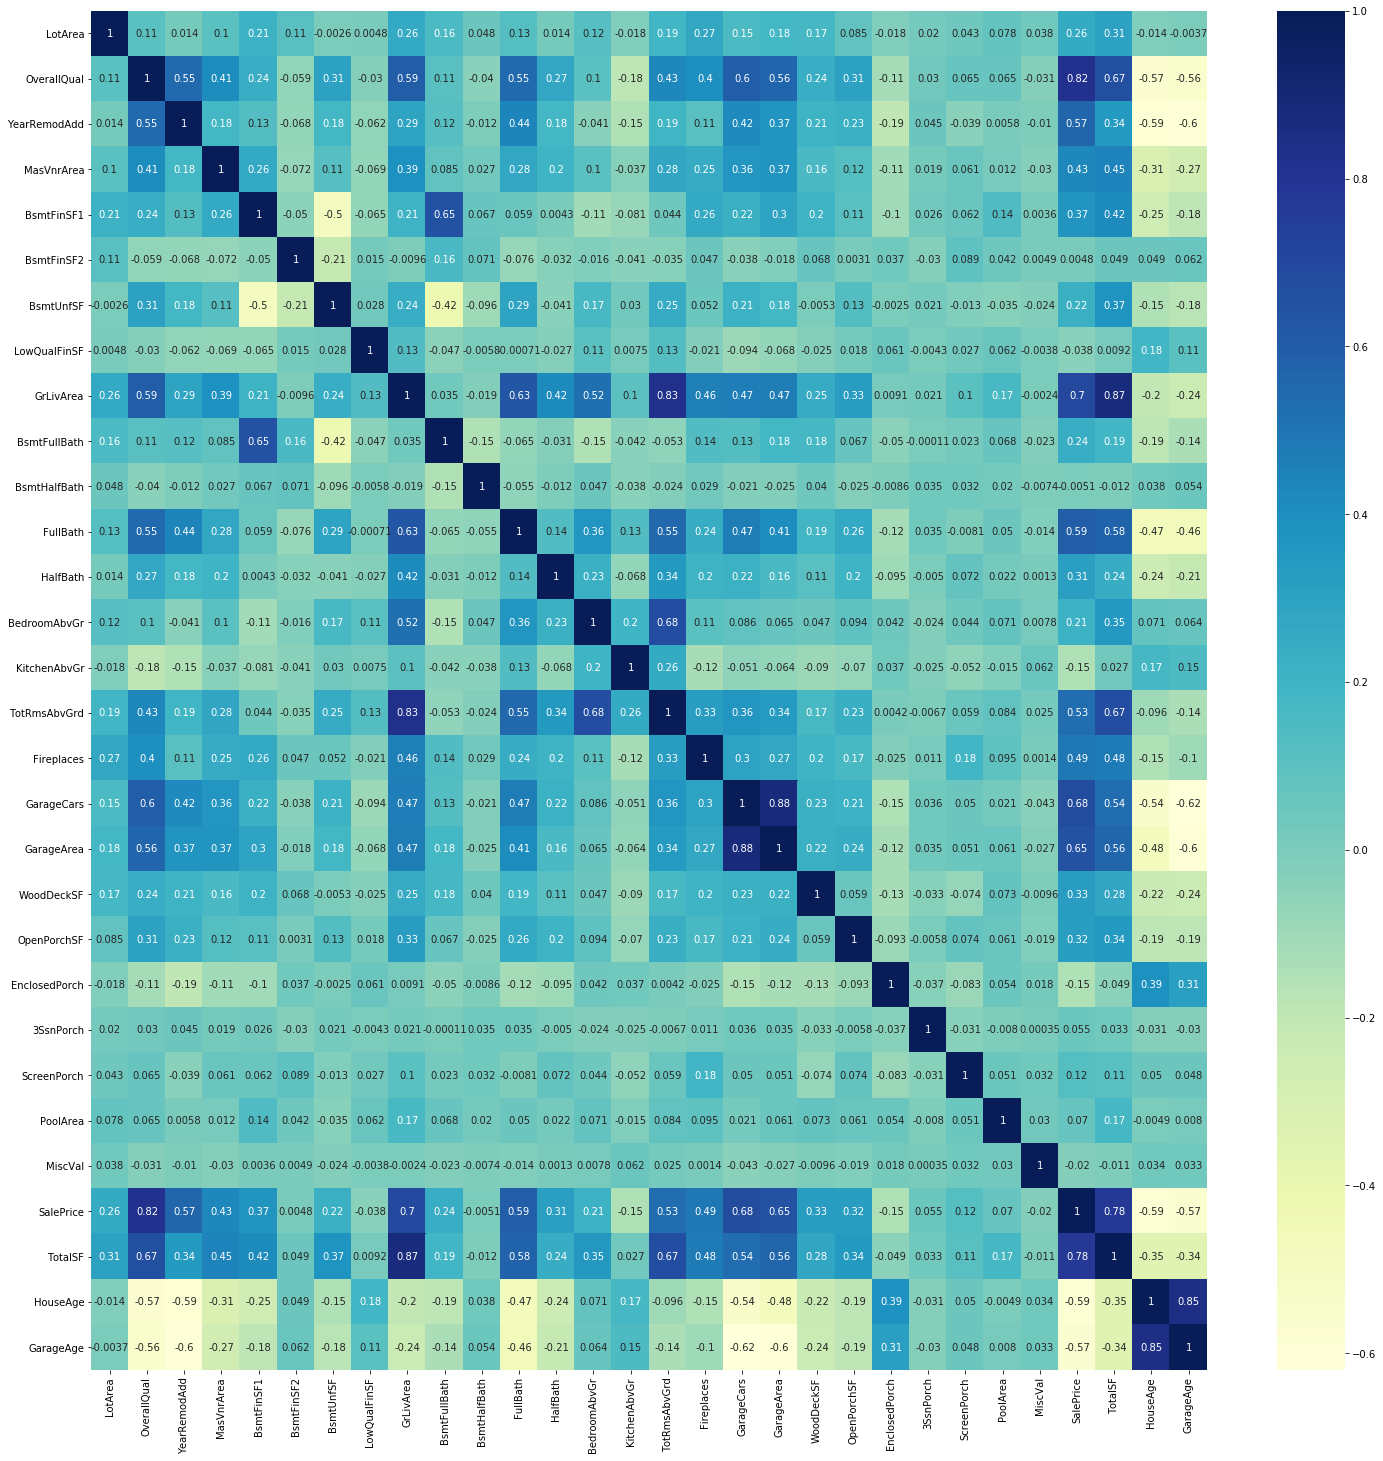

In [48]:
plt.figure(figsize=(25,25))
sns.heatmap(cor,annot=True,cmap="YlGnBu")
plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

HousePrice_cont = scaler.fit_transform(HousePrice_cont)


### Splitting test and train

In [50]:
# From SKlearn import train_test_split processing
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test = train_test_split(HousePrice,train_size=0.7,test_size=0.3,random_state=42)

#### Why we choose random_state=42 found in stackoverflow 
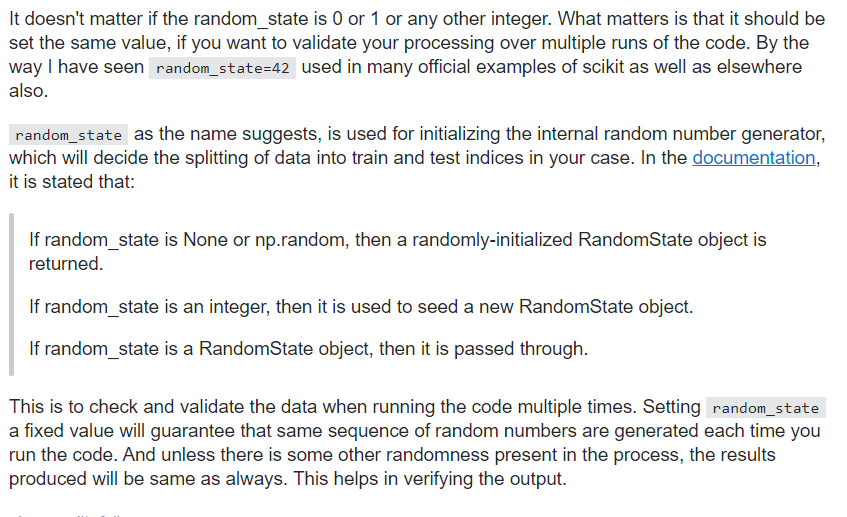

### Train data set

In [52]:
y_train = X_train.pop('SalePrice')
X_train = X_train

### Test Data Set

In [53]:
y_test = X_test.pop('SalePrice')
X_test = X_test

## Step3: Building Model & Evaluation

#### As no. of features are many so better reduce features with help of RFE and reduce only top 50 features

In [54]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
# import required regressions
lm = LinearRegression()
lm.fit(X_train,y_train)
# import RFE to reduce features
from sklearn.feature_selection import RFE
rfe=RFE(lm,50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=50, step=1, verbose=0)

In [55]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_scores.head()

Column_Names  Status  Rank
0   OverallQual    True     1
1  YearRemodAdd   False   169
2    MasVnrArea   False   187
3    BsmtFinSF2   False   186
4     BsmtUnfSF   False   184

In [56]:
rfe_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_columns

['OverallQual',
 'GarageCars',
 'MSSubClass_30',
 'MSSubClass_45',
 'MSSubClass_90',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Utilities_NoSeWa',
 'Neighborhood_NoRidge',
 'Neighborhood_StoneBr',
 'Condition2_PosN',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'OverallCond_2',
 'OverallCond_3',
 'OverallCond_6',
 'OverallCond_7',
 'OverallCond_8',
 'OverallCond_9',
 'RoofMatl_CompShg',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_Stone',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Po',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'HeatingQC_Po',
 'Electrical_FuseP',
 'Functional_Maj2',
 'Functional_Sev',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageCond_Po',
 'SaleType_Oth',
 'SaleCondition_Alloca']

In [57]:
# Train and test set for the RFE selected columns
X_train = X_train[rfe_columns]
X_test = X_test[rfe_columns]

In [58]:
# Copying dataframes X_train and X_test for subjective question
X_train_DT5 = X_train
X_test_DT5= X_test
X_train_DT5.head()

OverallQual  GarageCars  MSSubClass_30  MSSubClass_45  MSSubClass_90  \
135             7           2              0              0              0   
1452            5           2              0              0              0   
762             7           2              0              0              0   
932             9           3              0              0              0   
435             7           2              0              0              0   

      MSSubClass_160  MSSubClass_180  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
135                0               0            0            0            1   
1452               0               1            0            0            0   
762                0               0            1            0            0   
932                0               0            0            0            1   
435                0               0            0            0            1   

      MSZoning_RM  Utilities_NoSeWa  Neighborhood_NoRidge  \
135             0                 0                     0   
1452            1                 0                     0   
762             0                 0                     0   
932             0                 0                     0   
435             0                 0                     0   

      Neighborhood_StoneBr  Condition2_PosN  BldgType_Duplex  BldgType_Twnhs  \
135                      0                0                0               0   
1452                     0                0                0               0   
762                      0                0                0               0   
932                      0                0                0               0   
435                      0                0                0               0   

      BldgType_TwnhsE  OverallCond_2  OverallCond_3  OverallCond_6  \
135                 0              0              0              1   
1452                1              0              0              0   
762                 0              0              0              0   
932                 0              0              0              0   
435                 0              0              0              1   

      OverallCond_7  OverallCond_8  OverallCond_9  RoofMatl_CompShg  \
135               0              0              0                 1   
1452              0              0              0                 1   
762               0              0              0                 1   
932               0              0              0                 1   
435               0              0              0                 1   

      RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  \
135                0              0                 0                 0   
1452               0              0                 0                 0   
762                0              0                 0                 0   
932                0              0                 0                 0   
435                0              0                 0                 0   

      RoofMatl_WdShngl  Exterior1st_BrkComm  Exterior1st_CBlock  \
135                  0                    0                   0   
1452                 0                    0                   0   
762                  0                    0                   0   
932                  0                    0                   0   
435                  0                    0                   0   

      Exterior1st_Stone  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  BsmtCond_Po  \
135                   0            0            0            1            0   
1452                  0            0            1            0            0   
762                   0            0            1            0            0   
932                   0            0            0            0            0   
435                   0            0            1            0            0   

      Heating_GasA  Heating_GasW  Hea

In [59]:
# Dropping of 5 columns 
X_train_DT5 =X_train_DT5.drop(['OverallQual','SaleCondition_Alloca','Exterior1st_BrkComm','RoofMatl_WdShake','MSZoning_RH'],axis=1)
X_test_DT5= X_test_DT5.drop(['OverallQual','SaleCondition_Alloca','Exterior1st_BrkComm','RoofMatl_WdShake','MSZoning_RH'],axis=1)
X_train_DT5.head()

GarageCars  MSSubClass_30  MSSubClass_45  MSSubClass_90  MSSubClass_160  \
135            2              0              0              0               0   
1452           2              0              0              0               0   
762            2              0              0              0               0   
932            3              0              0              0               0   
435            2              0              0              0               0   

      MSSubClass_180  MSZoning_FV  MSZoning_RL  MSZoning_RM  Utilities_NoSeWa  \
135                0            0            1            0                 0   
1452               1            0            0            1                 0   
762                0            1            0            0                 0   
932                0            0            1            0                 0   
435                0            0            1            0                 0   

      Neighborhood_NoRidge  Neighborhood_StoneBr  Condition2_PosN  \
135                      0                     0                0   
1452                     0                     0                0   
762                      0                     0                0   
932                      0                     0                0   
435                      0                     0                0   

      BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  OverallCond_2  \
135                 0               0                0              0   
1452                0               0                1              0   
762                 0               0                0              0   
932                 0               0                0              0   
435                 0               0                0              0   

      OverallCond_3  OverallCond_6  OverallCond_7  OverallCond_8  \
135               0              1              0              0   
1452              0              0              0              0   
762               0              0              0              0   
932               0              0              0              0   
435               0              1              0              0   

      OverallCond_9  RoofMatl_CompShg  RoofMatl_Metal  RoofMatl_Roll  \
135               0                 1               0              0   
1452              0                 1               0              0   
762               0                 1               0              0   
932               0                 1               0              0   
435               0                 1               0              0   

      RoofMatl_Tar&Grv  RoofMatl_WdShngl  Exterior1st_CBlock  \
135                  0                 0                   0   
1452                 0                 0                   0   
762                  0                 0                   0   
932                  0                 0                   0   
435                  0                 0                   0   

      Exterior1st_Stone  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  BsmtCond_Po  \
135                   0            0            0            1            0   
1452                  0            0            1            0            0   
762                   0            0            1            0            0   
932                   0            0            0            0            0   
435                   0            0            1            0            0   

      Heating_GasA  Heating_GasW  Heating_Grav  HeatingQC_Po  \
135              1             0             0             0   
1452             1             0             0             0   
762              1             0             0             0   
932              1             0             0             0   
435              1             0             0             0   

      Electrical_FuseP  Functional_Maj2  Functional_Sev  GarageType_Attchd  \
135          

## Ridge Regression

In [60]:
# GridSearchCV for optimal alpha
# import GridSearchCV KFolds and cross_val_score from sklearn
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score

folds = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


model =Ridge()

model_cv=GridSearchCV(estimator=model,param_grid=hyper_params,scoring='r2',cv=folds,verbose=1,return_train_score=True)

model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [61]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.004786  1.715375e-03         0.001595    4.883640e-04      0.0001   
1        0.004181  3.877259e-04         0.001396    4.886557e-04       0.001   
2        0.002792  3.990421e-04         0.001796    3.999242e-04        0.01   
3        0.003391  7.975341e-04         0.000997    4.909339e-07        0.05   
4        0.002194  3.993035e-04         0.000998    3.504023e-07         0.1   
5        0.002194  3.990175e-04         0.000798    3.991853e-04         0.2   
6        0.003192  3.991605e-04         0.001196    3.992086e-04         0.3   
7        0.003990  6.320339e-04         0.001396    7.967711e-04         0.4   
8        0.002394  4.890060e-04         0.001198    4.009009e-04         0.5   
9        0.002793  7.465697e-04         0.001197    3.981594e-04         0.6   
10       0.003391  4.888506e-04         0.001795    3.990653e-04         0.7   
11       0.002194  3.993276e-04         0.000998    4.672031e-07         0.8   
12       0.002793  3.987313e-04         0.001396    4.882274e-04         0.9   
13       0.003192  7.463529e-04         0.001196    3.987075e-04           1   
14       0.002994  1.096019e-03         0.001196    4.022063e-04           2   
15       0.003990  6.306764e-04         0.001795    3.990669e-04           3   
16       0.003591  4.884999e-04         0.000998    4.156970e-07           4   
17       0.002593  4.885203e-04         0.000798    3.989462e-04           5   
18       0.002394  4.888698e-04         0.000599    4.889670e-04           6   
19       0.002394  4.886757e-04         0.000798    3.991131e-04           7   
20       0.002394  4.893567e-04         0.000998    5.761645e-07           8   
21       0.002799  9.722422e-04         0.001390    4.934595e-04           9   
22       0.004787  1.715623e-03         0.001795    3.993043e-04          10   
23       0.003191  3.990427e-04         0.001197    3.990174e-04          20   
24       0.002794  3.984987e-04         0.001197    3.991394e-04          50   
25       0.002397  4.888301e-04         0.000604    4.933461e-04         100   
26       0.002188  4.024025e-04         0.000798    3.990890e-04         500   
27       0.001995  2.611745e-07         0.000997    2.431402e-07        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.802180           0.750870   
1    {'alpha': 0.001}           0.802191           0.751129   
2     {'alpha': 0.01}           0.802291           0.753530   
3     {'alpha': 0.05}           0.802657           0.761208   
4      {'alpha': 0.1}           0.802997           0.766824   
5      {'alpha': 0.2}           0.803473           0.772447   
6      {'alpha': 0.3}           0.803806           0.775048   
7      {'alpha': 0.4}           0.804058           0.776420   
8      {'alpha': 0.5}           0.804257           0.777195   
9      {'alpha': 0.6}           0.804421           0.777644   
10     {'alpha': 0.7}           0.804557           0.777902   
11     {'alpha': 0.8}           0.804673           0.778042   
12     {'alpha': 0.9}           0.804770           0.778105   
13     {'alpha': 1.0}           0.804854           0.778116   
14     {'alpha': 2.0}           0.805169           0.777298   
15     {'alpha': 3.0}           0.804953           0.776234   
16     {'alpha': 4.0}           0.804475           0.775265   
17     {'alpha': 5.0}           0.803862           0.774404   
18     {'alpha': 6.0}           0.803179           0.773636   
19     {'alpha': 7.0}           0.802466           0.772945   
20     {'alpha': 8.0}           0.801744           0.772318   
21     {'alpha': 9.0}           0.801025           0.771745   
22    {'alpha': 10.0}           0.800318           0.771218   
23      {'alpha': 20}           0.794215           0.767472   
24      {'alpha': 50}           0.782772           0.762092   
25     {'alpha': 100}           0.771145     

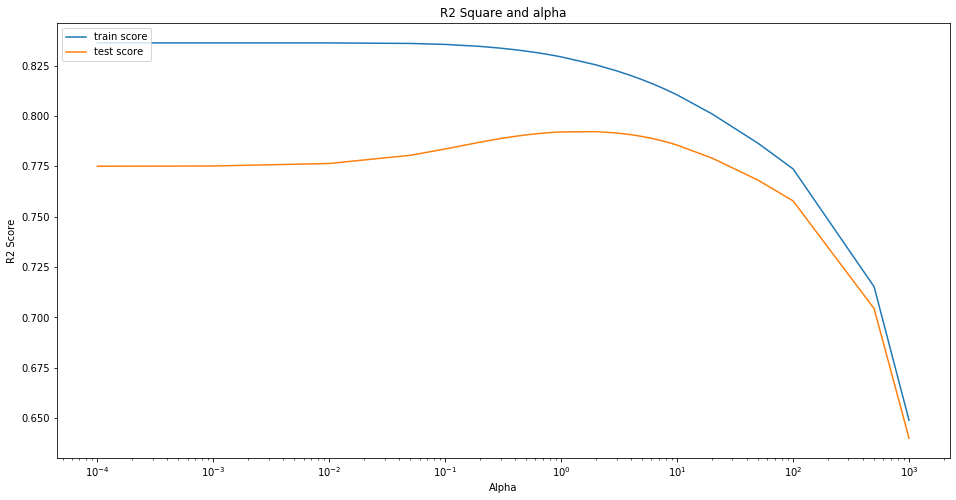

In [62]:
# Plotting of test and train score wtih alpha
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.title("R2 Square and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [63]:
# Best alpha used for Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
from sklearn import metrics
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8338150491098468
0.7843342362690385


In [64]:
# Best parameter(Alpha value)
model_cv.best_params_

{'alpha': 2.0}

### Ridge for best cross validated alpha

In [65]:
# Best alpha used for Lasso
ridge = Ridge(alpha=2.0)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8241266385673569
0.802757655734386


In [66]:
ridge.coef_

array([ 0.13446976,  0.13918641, -0.16539175, -0.15046024, -0.0166402 ,
       -0.05637507, -0.05255371,  0.15011389,  0.07316832,  0.10951757,
       -0.01161511, -0.08777804,  0.18865415,  0.12399692, -0.21540257,
       -0.0166402 , -0.11841432, -0.07759668, -0.03552226, -0.17479158,
        0.05074323,  0.0845437 ,  0.09522975,  0.12985241,  0.03027689,
        0.03609572,  0.02425773,  0.12142321,  0.02018621,  0.14046528,
       -0.19867567, -0.01129724,  0.07952967, -0.2092601 , -0.13403435,
       -0.19803517,  0.04108852,  0.09900639,  0.17009378, -0.18004245,
       -0.07466907, -0.10251955, -0.14505475, -0.11352317,  0.06971182,
        0.09098002,  0.12347459,  0.11346738,  0.19569073,  0.14242061])

In [67]:
# Creating dataframe of lasso coeffiecients and features
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Feature','Coef']

In [68]:
# Top ten feature selection from our model
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feature       Coef
0            OverallQual  10.827033
49  SaleCondition_Alloca   0.195691
13  Neighborhood_StoneBr   0.188654
39          Heating_Grav   0.170094
8            MSZoning_RH   0.150114
30   Exterior1st_BrkComm   0.140465
2          MSSubClass_30   0.139186
1             GarageCars   0.134470
24      RoofMatl_CompShg   0.129852
14       Condition2_PosN   0.123997

##  Lasso regression

In [69]:
# GridSearchCV for optimal alpha
# import GridSearchCV KFolds and cross_val_score from sklearn
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score

folds = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


model =Lasso()

model_cv=GridSearchCV(estimator=model,param_grid=hyper_params,scoring='r2',cv=folds,verbose=1,return_train_score=True)

model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [70]:
# Dataframe creation for all model paramters
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.011569  3.191564e-03         0.001795    3.986837e-04       0.0001   
1        0.003391  4.896876e-04         0.001596    4.889690e-04       0.0010   
2        0.003989  6.310530e-04         0.001197    3.994466e-04       0.0100   
3        0.002792  7.459718e-04         0.001000    5.877683e-06       0.0500   
4        0.002992  2.431402e-07         0.001596    4.885582e-04       0.1000   
5        0.002992  5.917394e-07         0.001396    4.884804e-04       0.2000   
6        0.002794  3.996201e-04         0.000997    2.745853e-06       0.3000   
7        0.003590  4.884220e-04         0.001396    4.881884e-04       0.4000   
8        0.003590  1.017458e-03         0.000997    8.395585e-07       0.5000   
9        0.002792  3.994943e-04         0.001795    3.988747e-04       0.6000   
10       0.003391  1.017271e-03         0.001396    4.888894e-04       0.7000   
11       0.002803  7.356450e-04         0.000788    3.943033e-04       0.8000   
12       0.002190  4.014656e-04         0.000800    3.999546e-04       0.9000   
13       0.002188  4.032123e-04         0.000799    3.992766e-04       1.0000   
14       0.001995  1.618959e-05         0.000801    4.003375e-04       2.0000   
15       0.001979  2.237408e-05         0.000990    1.307751e-05       3.0000   
16       0.002400  4.840605e-04         0.000599    4.892014e-04       4.0000   
17       0.001996  2.062011e-06         0.000997    2.137805e-06       5.0000   
18       0.002194  3.991611e-04         0.000997    4.909339e-07       6.0000   
19       0.003191  1.163195e-03         0.001596    7.977963e-04       7.0000   
20       0.003391  7.977963e-04         0.001197    7.461617e-04       8.0000   
21       0.002992  6.307512e-04         0.000998    6.572747e-07       9.0000   
22       0.004189  3.990177e-04         0.001197    3.988036e-04      10.0000   
23       0.002992  6.307511e-04         0.001197    3.989939e-04      20.0000   
24       0.002593  4.888113e-04         0.000998    4.623108e-07      50.0000   
25       0.002992  3.989506e-07         0.000997    5.519789e-07     100.0000   
26       0.002393  4.882858e-04         0.000998    1.907349e-07     500.0000   
27       0.002194  3.986599e-04         0.000804    4.023607e-04    1000.0000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.803039           0.771629   
1    {'alpha': 0.001}           0.795835           0.762478   
2     {'alpha': 0.01}           0.753379           0.732194   
3     {'alpha': 0.05}           0.698311           0.683222   
4      {'alpha': 0.1}           0.633298           0.616490   
5      {'alpha': 0.2}           0.525360           0.520831   
6      {'alpha': 0.3}           0.348975           0.352382   
7      {'alpha': 0.4}           0.104143           0.111141   
8      {'alpha': 0.5}          -0.000444          -0.014418   
9      {'alpha': 0.6}          -0.000444          -0.014418   
10     {'alpha': 0.7}          -0.000444          -0.014418   
11     {'alpha': 0.8}          -0.000444          -0.014418   
12     {'alpha': 0.9}          -0.000444          -0.014418   
13     {'alpha': 1.0}          -0.000444          -0.014418   
14     {'alpha': 2.0}          -0.000444          -0.014418   
15     {'alpha': 3.0}          -0.000444          -0.014418   
16     {'alpha': 4.0}          -0.000444          -0.014418   
17     {'alpha': 5.0}          -0.000444          -0.014418   
18     {'alpha': 6.0}          -0.000444          -0.014418   
19     {'alpha': 7.0}          -0.000444          -0.014418   
20     {'alpha': 8.0}          -0.000444          -0.014418   
21     {'alpha': 9.0}          -0.000444          -0.014418   
22    {'alpha': 10.0}          -0.000444          -0.014418   
23      {'alpha': 20}          -0.000444          -0.014418   
24      {'alpha': 50}          -0.000444          -0.014418   
25     {'alpha':

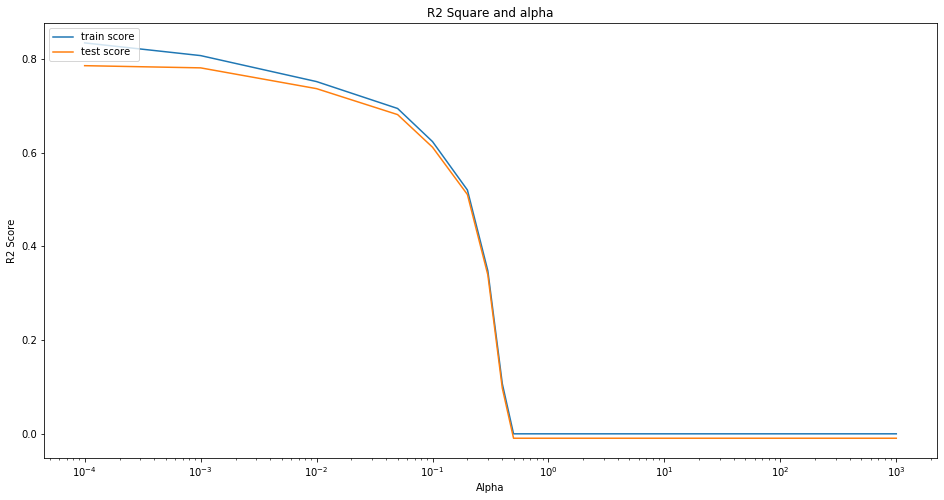

In [71]:
# Plotting of test and train score wtih alpha
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.title("R2 Square and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [72]:
# Best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

### Lasso for best cross validated alpha

In [73]:
# Best alpha used for Lasso
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8301028398023781
0.7960122778870437


In [74]:
lasso.coef_

array([ 1.31555240e-01,  1.37376261e-01, -1.67281279e-01, -1.66911452e-01,
       -4.25956374e-02, -4.96780179e-02, -5.65759430e-02,  2.30586978e-01,
        1.53845033e-01,  1.83509722e-01,  6.21416137e-02, -1.76324021e-01,
        2.02747091e-01,  1.33751312e-01, -3.88240873e-01, -2.02342956e-04,
       -1.30804710e-01, -8.22563021e-02, -2.77426017e-02, -1.89587081e-01,
        5.15785098e-02,  8.19110672e-02,  9.75395980e-02,  1.39794289e-01,
        1.71185332e-01,  1.49281448e-01,  1.19240103e-01,  3.13988642e-01,
        1.44436938e-01,  3.27205769e-01, -3.79336965e-01, -0.00000000e+00,
        1.41307504e-01, -2.43441970e-01, -1.54657326e-01, -2.19976558e-01,
        1.92885241e-02,  1.10164614e-01,  2.15031088e-01, -2.63999758e-01,
       -1.07914974e-01, -1.61761385e-01, -1.96052152e-01, -2.90389522e-01,
        6.85813277e-02,  1.06290047e-01,  1.26741004e-01,  2.12425434e-01,
        5.00703392e-01,  1.71281120e-01])

In [75]:
# Creating dataframe of lasso coeffiecients and features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [76]:
# Top ten feature selection from our model
lasso_coef.sort_values(by='Coef',ascending=False).head(11)

Feature       Coef
0            OverallQual  10.642968
49  SaleCondition_Alloca   0.500703
30   Exterior1st_BrkComm   0.327206
28      RoofMatl_WdShake   0.313989
8            MSZoning_RH   0.230587
39          Heating_Grav   0.215031
48          SaleType_Oth   0.212425
13  Neighborhood_StoneBr   0.202747
10           MSZoning_RM   0.183510
25        RoofMatl_Metal   0.171185
9            MSZoning_RL   0.153845

In [77]:
lasso_coef[lasso_coef['Coef']!=0].shape

(49, 2)

### Ridge with best alpha = 2.0
* r2_score (Train) =  0.824
* r2_score (Test)  =  0.802
### Lasso  with best alpha = 0.0001
* r2_score (Train) = 0.830
* r2_score (Test)  = 0.796

Both ridge and Lasso 

## Final Model

In [78]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8301028398023781
0.7960122778870437


### Top 10 Features are for final model
01. OverallQual -     
02. SaleCondition_Alloca	
03. Exterior1st_BrkComm	
04. RoofMatl_WdShake	
05. MSZoning_RH	
06. Heating_Grav
07.	SaleType_Oth
08.	Neighborhood_StoneBr
09.	MSZoning_RM	
10. RoofMatl_Metal	



### Lasso regression with doubled alpha value

In [79]:
lasso = Lasso(alpha=0.0002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.826003764862395
0.7980864538040211


In [80]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [81]:
lasso_coef.sort_values(by='Coef',ascending=False).head(11)

Feature       Coef
0            OverallQual  10.863070
49  SaleCondition_Alloca   0.390310
13  Neighborhood_StoneBr   0.196575
39          Heating_Grav   0.181483
8            MSZoning_RH   0.165467
48          SaleType_Oth   0.143103
2          MSSubClass_30   0.138249
30   Exterior1st_BrkComm   0.133840
24      RoofMatl_CompShg   0.133770
1             GarageCars   0.133502
14       Condition2_PosN   0.124994

In [82]:
lasso_coef[lasso_coef['Coef']!=0].shape

(44, 2)

### Ridge regression with double alpha

In [83]:
ridge = Ridge(alpha=4.0)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8195282825801682
0.803085035276158


In [84]:
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Feature','Coef']

In [85]:
ridge_coef.sort_values(by='Coef',ascending=False).head(11)

Feature       Coef
0            OverallQual  10.862753
13  Neighborhood_StoneBr   0.172204
2          MSSubClass_30   0.140754
1             GarageCars   0.138107
39          Heating_Grav   0.129536
47         GarageCond_Po   0.117918
49  SaleCondition_Alloca   0.115849
24      RoofMatl_CompShg   0.114162
8            MSZoning_RH   0.111895
14       Condition2_PosN   0.109019
30   Exterior1st_BrkComm   0.089952

### Assignment dropping Top 5 fature and creating model

In [86]:
#Already X_train and X_test dataframe created with top 5 features removed now we will run model with less no. of varialbes
#GridSearchCV for optimal alpha
# import GridSearchCV KFolds and cross_val_score from sklearn
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score

folds = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


model =Lasso()

model_cv=GridSearchCV(estimator=model,param_grid=hyper_params,scoring='r2',cv=folds,verbose=1,return_train_score=True)

model_cv.fit(X_train_DT5,y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [87]:
# Dataframe creation for all model paramters
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.006183      0.001323         0.002593        0.000489       0.0001   
1       0.006781      0.002034         0.001596        0.000489       0.0010   
2       0.003790      0.000747         0.001396        0.000488       0.0100   
3       0.004388      0.000489         0.001596        0.000489       0.0500   
4       0.004588      0.000799         0.001994        0.000630       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.683390           0.679472           0.743967   
1   {'alpha': 0.001}           0.684386           0.651861           0.763779   
2    {'alpha': 0.01}           0.539375           0.535223           0.685767   
3    {'alpha': 0.05}           0.431803           0.379275           0.578873   
4     {'alpha': 0.1}           0.326116           0.321666           0.428681   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.672807           0.712735         0.698474        0.026534   
1           0.678630           0.685004         0.692732        0.037540   
2           0.552894           0.541962         0.571044        0.057658   
3           0.405701           0.433838         0.445898        0.069399   
4           0.323881           0.300791         0.340227        0.045144   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.754948            0.753605   
1                2            0.733285            0.734187   
2                3            0.588067            0.586165   
3                4            0.475355            0.466980   
4                5            0.360486            0.374845   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.744818            0.754552            0.747720   
1            0.718469            0.734550            0.720544   
2            0.566081            0.592896            0.592881   
3            0.434107            0.477401            0.455267   
4            0.314850            0.380232            0.328260   

   mean_train_score  std_train_score  
0          0.751129         0.004096  
1          0.728207         0.007146  
2          0.585218         0.009929  
3          0.461822         0.015897  
4          0.351735         0.025824

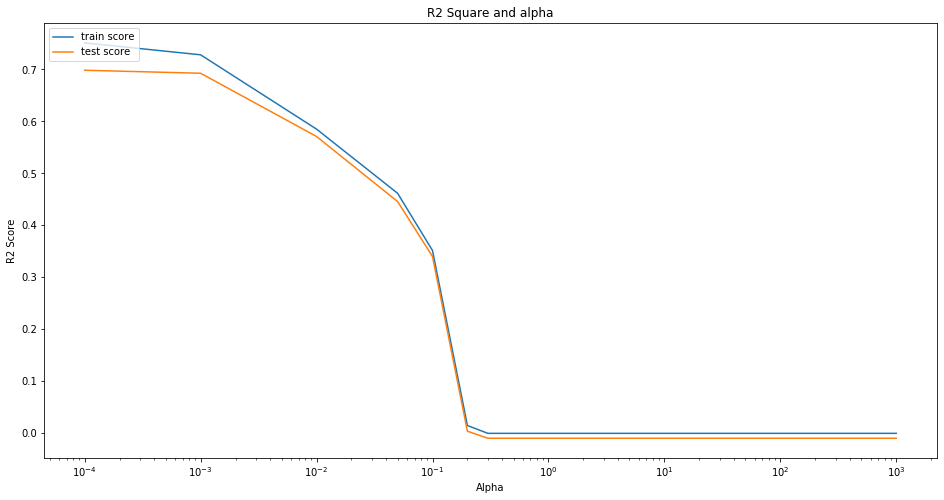

In [88]:
# Plotting of test and train score wtih alpha
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.title("R2 Square and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [89]:
# Best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

### Lasso for best cross validated alpha after removing top 5 features

In [90]:
# Best alpha used for Lasso
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_DT5,y_train)

y_train_pred = lasso.predict(X_train_DT5)
y_test_pred = lasso.predict(X_test_DT5)

print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.7474056310282897
0.7082307974164181


In [91]:
lasso.coef_

array([ 2.08155185e-01, -2.41157178e-01, -8.20133682e-02, -9.15174190e-02,
       -7.93495723e-02, -3.73805547e-01,  1.85144198e-01,  7.63548156e-02,
       -2.49473808e-02, -2.61721881e-01,  3.16275595e-01,  2.64617107e-01,
       -1.58410610e-01, -8.53760570e-06, -5.81535119e-02, -6.44381013e-02,
       -2.15396543e-01, -3.15368630e-01,  4.26264080e-02,  9.06706634e-02,
        1.42201824e-01,  2.73771680e-01, -2.30677205e-02,  0.00000000e+00,
        0.00000000e+00,  8.65367391e-02,  3.10017386e-01, -4.26350740e-02,
        1.57740837e-01, -5.18763323e-01, -2.91480273e-01, -4.56226821e-01,
       -1.54589281e-01,  1.52118480e-01,  2.26459226e-01, -3.31602370e-01,
       -2.55526319e-01, -1.81654755e-01, -1.21249710e-01, -2.76662193e-01,
        1.23343532e-01,  2.80595892e-01,  2.10623295e-01,  3.90834385e-01,
        4.79426510e-01])

In [92]:
# Creating dataframe of lasso coeffiecients and features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_DT5.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [93]:
# Top ten feature selection from our model
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

Feature       Coef
0             GarageCars  11.706490
44          SaleType_Oth   0.390834
11  Neighborhood_StoneBr   0.316276
27    Exterior1st_CBlock   0.310017
42    GarageType_BuiltIn   0.280596

#### Question:1 What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose to double the value of alpha for both ridge and lasso? 

#### Answer1: Optimal value of alpha for ridge and lasso regression

**Ridge with best alpha = 2.0**
<br>**Lasso with best alpha = 0.0001** 

<br> Second part of quetion is if we double vale we will get below predictors

#### Most important predictor variables are with double alpha in Lasso regression
01. OverallQual
02.	SaleCondition_Alloca	
03.	Neighborhood_StoneBr	
04.	Heating_Grav	
05.	MSZoning_RH	
06.	SaleType_Oth
07. MSSubClass_30	
08.	Exterior1st_BrkComm	
09. RoofMatl_CompShg	
10.	GarageCars	
	


#### Most important predictor variables are with double alpha in Ridge regression
01. OverallQual	
02.	Neighborhood_StoneBr	
03. MSSubClass_30	
04. GarageCars	
05. Heating_Grav
06. arageCond_Po	
07.	SaleCondition_Alloca	
08. RoofMatl_CompShg	
09.	MSZoning_RH	
10. Condition2_PosN	



#### Question 2: You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

#### Answer 2: Lasso is preferable because lasso with regularization it also works as a feature selection method, which reduces the number of features by making the coefficients of features to 0.

#### Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


#### Answer 3: After removing top 5 features again run model and found top 5 features are

01.	GarageCars	
02.	SaleType_Oth	
03. Neighborhood_StoneBr	
04. Exterior1st_CBlock	
05. GarageType_BuiltIn	